EDA(Exploratory Data Analysis) OPERATIONS ON THE CUSTOMER DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America

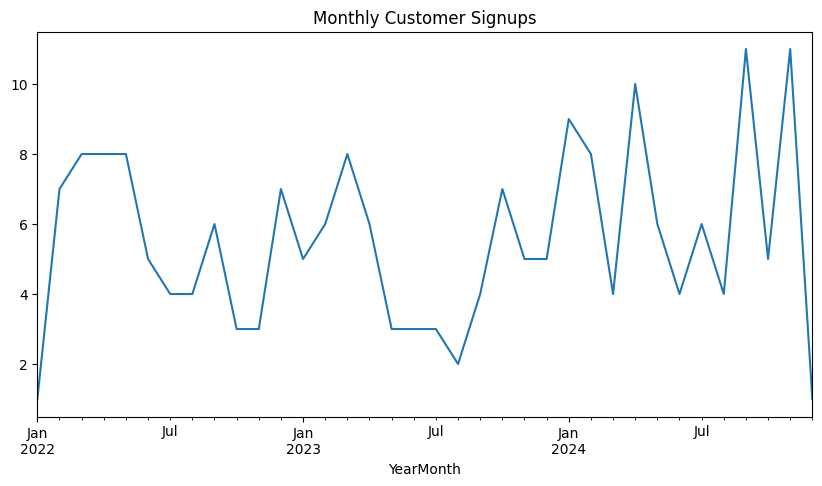

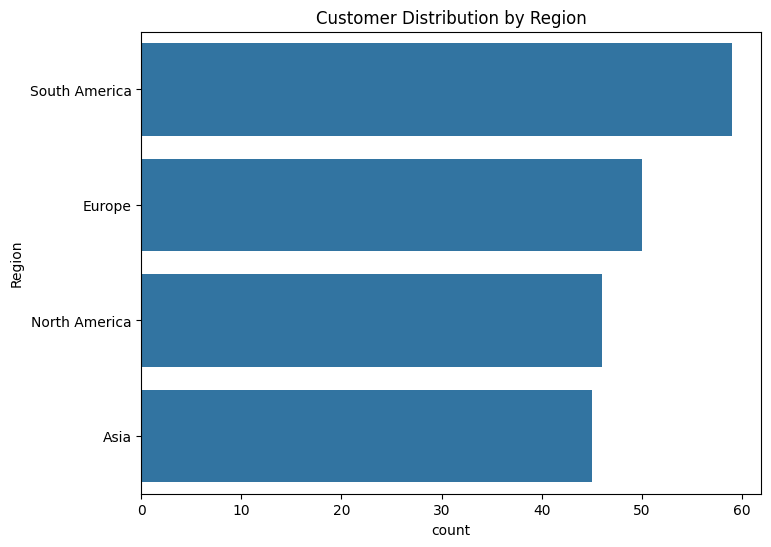

Customer count by region:
Region
Asia             45
Europe           50
North America    46
South America    59
Name: CustomerID, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
customers = pd.read_csv('Customers.csv')

#  Basic Data Overview
print(customers.info())
print(customers.head())
print(customers.describe(include='all'))


# 2. Check for missing values
print(customers.isnull().sum())
#3.underastand data types
print("\nData Types of Each Column:")
print(customers.dtypes)

# 4. Check for duplicate rows
print(customers.duplicated().sum())

# 5. Analyze categorical variables
print(customers['Region'].value_counts())

# 6. Analyze SignupDate trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M')

# Plot monthly signups
signup_trends = customers.groupby('YearMonth').size()
signup_trends.plot(kind='line', figsize=(10, 5), title='Monthly Customer Signups')
plt.show()

# 7. Regional Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='Region', data=customers, order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.show()


# Insights extraction
regional_insights = customers.groupby('Region')['CustomerID'].count()
print("Customer count by region:")
print(regional_insights)


Missing Values in Heatmap

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


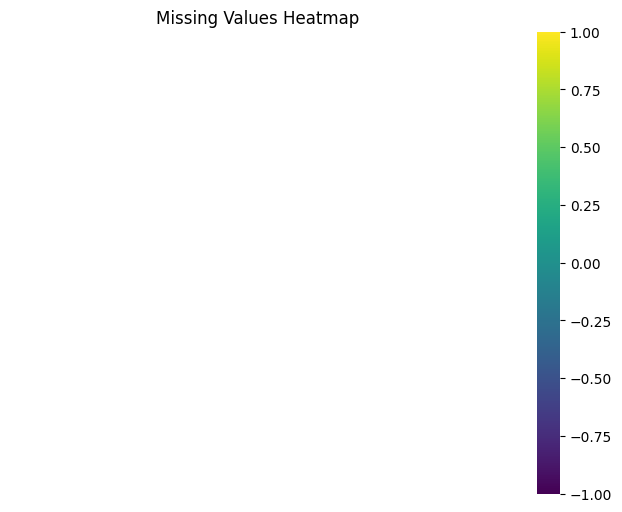

In [2]:
import missingno as msno

# Visualize missing values
msno.heatmap(customers, figsize=(8, 6), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Signup Date Analysis and Visualize trends in signups:

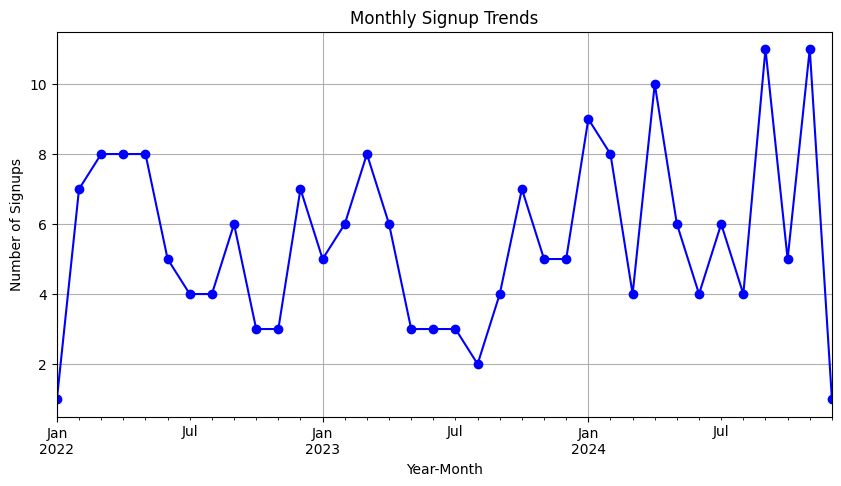

In [3]:
# Line plot for signups over time
signup_trends.plot(kind='line', figsize=(10, 5), color='blue', marker='o', title='Monthly Signup Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()



 Region-wise Customer Distribution and Visualize the regional distribution of customers:

<ipython-input-4-43d47f01689d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Region', data=customers, order=customers['Region'].value_counts().index, palette='coolwarm')


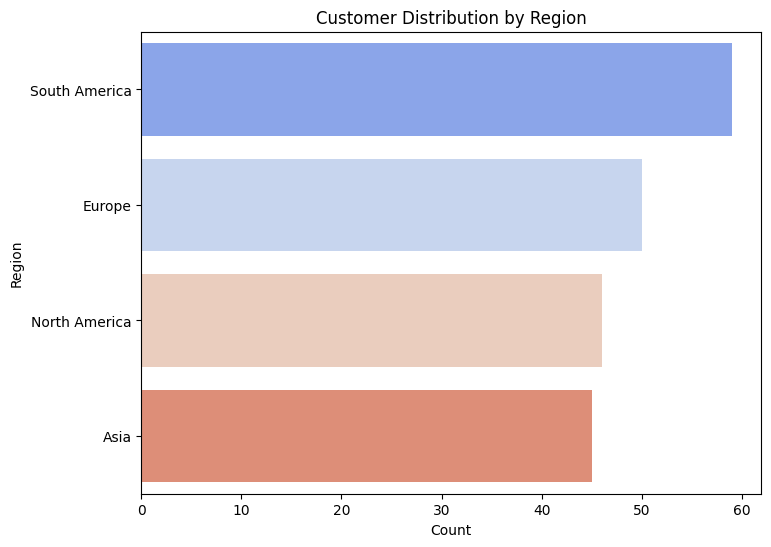

In [4]:
# Bar plot for customer count by region
plt.figure(figsize=(8, 6))
sns.countplot(y='Region', data=customers, order=customers['Region'].value_counts().index, palette='coolwarm')
plt.title('Customer Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


Signups by Day of the Week and
Explore if signups are more frequent on certain days:

<ipython-input-19-2953b8324eb2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=customers, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


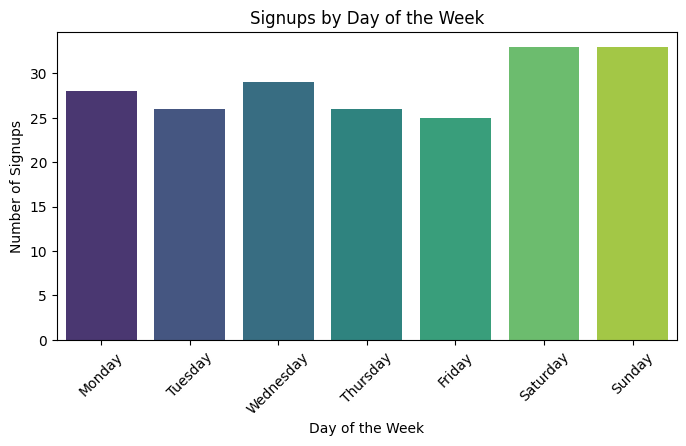

In [19]:
# Extract day of the week
customers['DayOfWeek'] = customers['SignupDate'].dt.day_name()

# Plot the signups by day
plt.figure(figsize=(8, 4))
sns.countplot(x='DayOfWeek', data=customers, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Signups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()



Top Signup Months and
Identify the months with the highest signups:



<ipython-input-6-96a507f8e647>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=customers, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='muted')


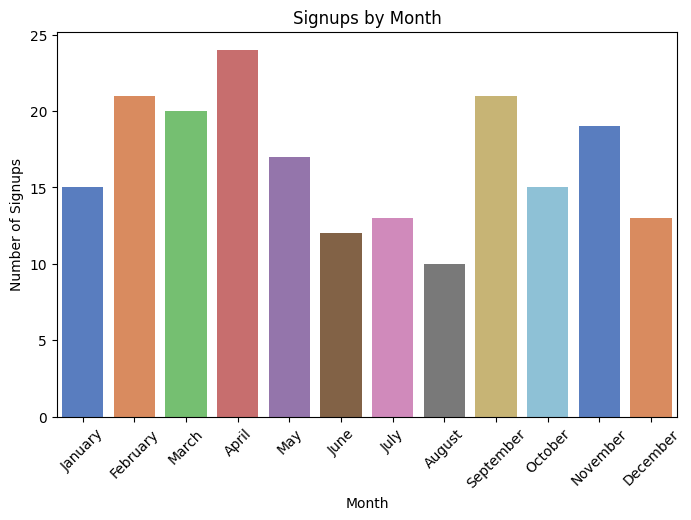

In [6]:
# Extract month names
customers['Month'] = customers['SignupDate'].dt.month_name()

# Plot the signups by month
plt.figure(figsize=(8, 5))
sns.countplot(x='Month', data=customers, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='muted')
plt.title('Signups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()


Customer Count Growth

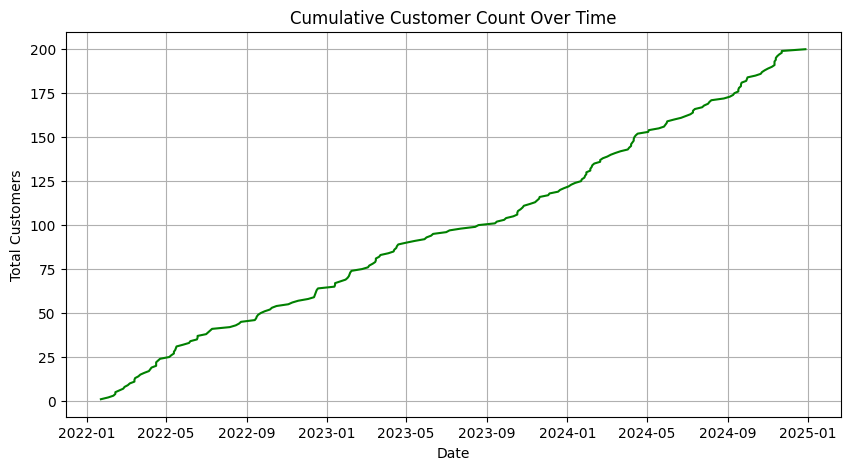

In [7]:
# Cumulative signups over time
customers = customers.sort_values(by='SignupDate')
customers['CumulativeCount'] = range(1, len(customers) + 1)

plt.figure(figsize=(10, 5))
plt.plot(customers['SignupDate'], customers['CumulativeCount'], color='green')
plt.title('Cumulative Customer Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Customers')
plt.grid()
plt.show()


 Bivariate Analysis in EDA

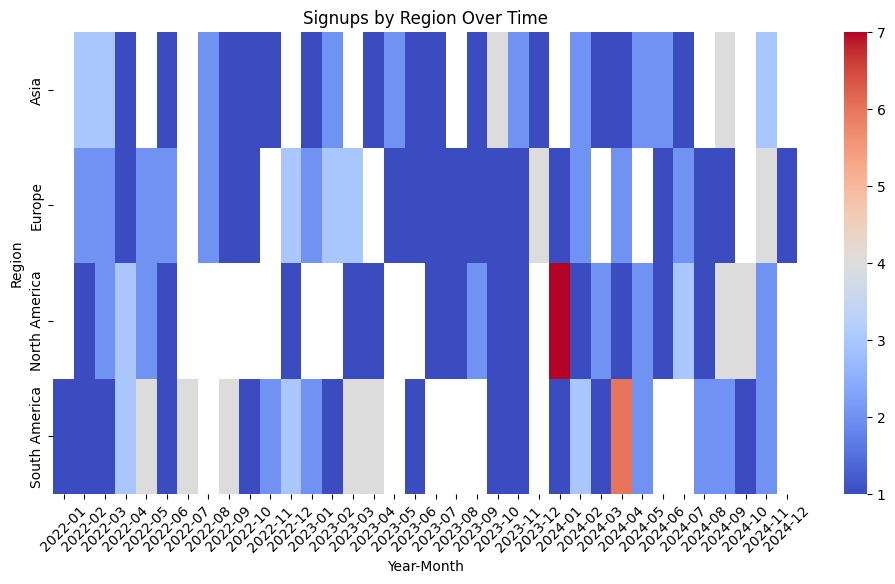

In [11]:
# Group by Region and Year-Month
region_trends = customers.groupby(['Region', 'YearMonth']).size().unstack()

# Heatmap to visualize trends
plt.figure(figsize=(12, 6))
sns.heatmap(region_trends, cmap='coolwarm', annot=False, cbar=True)
plt.title('Signups by Region Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()


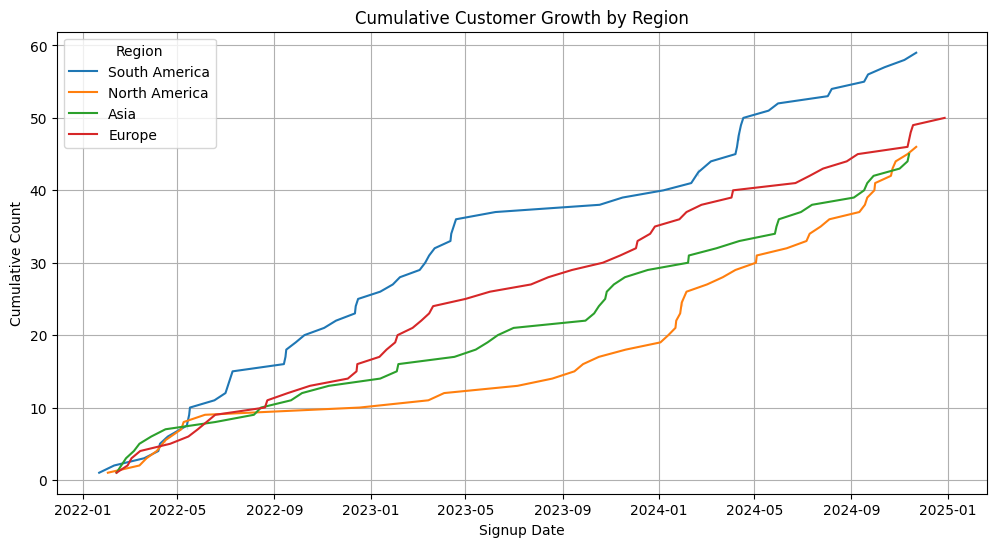

In [13]:
# Cumulative signups by region over time
customers['CumulativeCount'] = customers.groupby('Region').cumcount() + 1

plt.figure(figsize=(12, 6))
sns.lineplot(data=customers, x='SignupDate', y='CumulativeCount', hue='Region', palette='tab10')
plt.title('Cumulative Customer Growth by Region')
plt.xlabel('Signup Date')
plt.ylabel('Cumulative Count')
plt.legend(title='Region')
plt.grid()
plt.show()


Univariate Analysis in EDA

Summary Statistics for Numerical Columns:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00


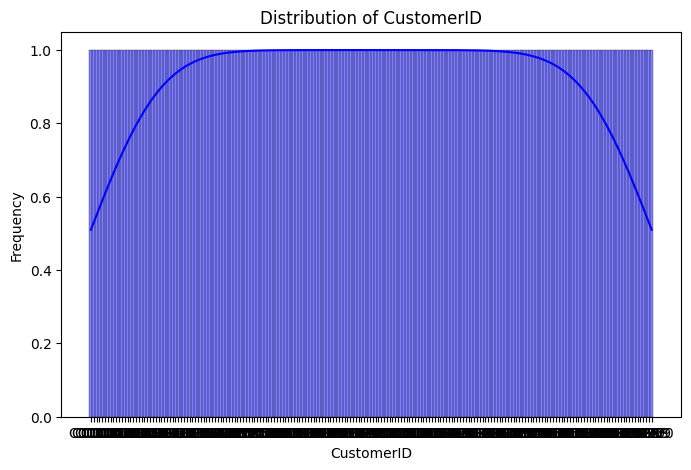


Unique Values in Categorical Columns:
CustomerName: 200 unique values
Region: 4 unique values


<ipython-input-23-fae001f07ff9>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Region', data=df, order=df['Region'].value_counts().index, palette='Set2')


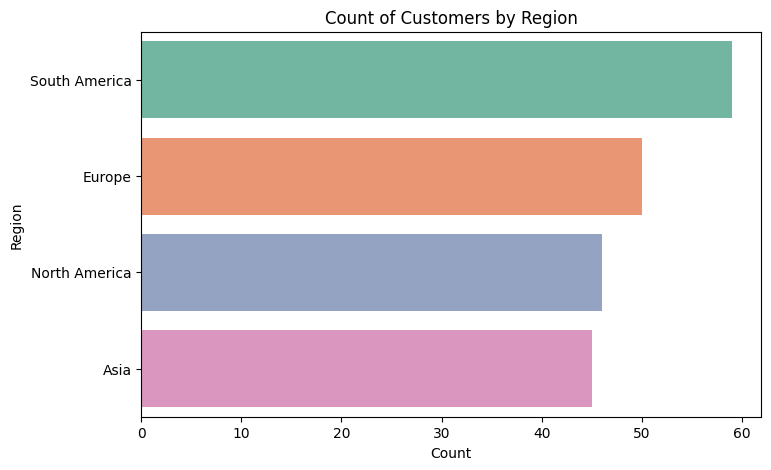


Summary for SignupDate:
count                    200
mean     2023-07-19 08:31:12
min      2022-01-22 00:00:00
25%      2022-09-26 12:00:00
50%      2023-08-31 12:00:00
75%      2024-04-12 12:00:00
max      2024-12-28 00:00:00
Name: SignupDate, dtype: object


<ipython-input-23-fae001f07ff9>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SignupYear', data=df, palette='Set3')


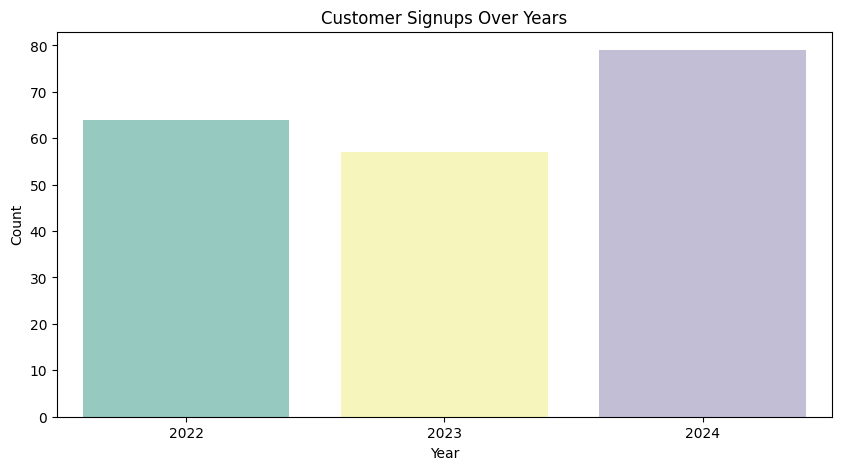

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Customers.csv')

# Convert 'SignupDate' to datetime
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')

# Univariate Analysis
# Numerical Variables
print("Summary Statistics for Numerical Columns:")
print(df.describe())

# Histogram for Numerical Variable
plt.figure(figsize=(8, 5))
sns.histplot(df['CustomerID'], kde=True, color='blue')
plt.title('Distribution of CustomerID')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()

# Categorical Variables
print("\nUnique Values in Categorical Columns:")
for col in ['CustomerName', 'Region']:
    print(f"{col}: {df[col].nunique()} unique values")

# Bar Plot for Categorical Variable
plt.figure(figsize=(8, 5))
sns.countplot(y='Region', data=df, order=df['Region'].value_counts().index, palette='Set2')
plt.title('Count of Customers by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# Date Variable
print("\nSummary for SignupDate:")
print(df['SignupDate'].describe())

# Line Plot for Date Distribution
plt.figure(figsize=(10, 5))
df['SignupYear'] = df['SignupDate'].dt.year
sns.countplot(x='SignupYear', data=df, palette='Set3')
plt.title('Customer Signups Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


Outliers detection

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Customers.csv')

# Detecting Outliers for Numerical Data
# Exclude 'CustomerID' as it's likely an identifier and not suitable for outlier analysis
numerical_cols = df.select_dtypes(include=['number']).columns

# Boxplots to Visualize Outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.show()

# Using IQR to Identify Outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in each numerical column
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"\nOutliers in {col}: {len(outliers)} rows")
    print(outliers)

# Z-Score Method for Outlier Detection
from scipy.stats import zscore
df['z_score'] = zscore(pd.to_numeric(df['CustomerID'], errors='coerce').fillna(0)) #CustomerID might be containing string values. Convert into numeric and fill nan with 0 for calculation.

outliers_z = df[np.abs(df['z_score']) > 3]
print("\nOutliers Detected Using Z-Score:")
print(outliers_z)


Outliers Detected Using Z-Score:
Empty DataFrame
Columns: [CustomerID, CustomerName, Region, SignupDate, z_score]
Index: []
